# properties

In [7]:
dir_data='/Users/astro/Documents/notebooks/zs/data/'


dir_res='/Users/astro/Documents/notebooks/zs/result/'

dir_pair='/Users/astro/Documents/notebooks/zs/result/pair/'


dir_mpl8='/Users/astro/Documents/notebooks/manga/spectro/analysis/MPL-8/'


/Users/astro/Documents/notebooks/zs/result/pair_info_DO2_mass_150_1000.fits


/Users/astro/Documents/notebooks/zs/result/pair_info_KD02_mass_150_1000.fits


<Figure size 432x288 with 0 Axes>

/Users/astro/.local/miniconda3/envs/public/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


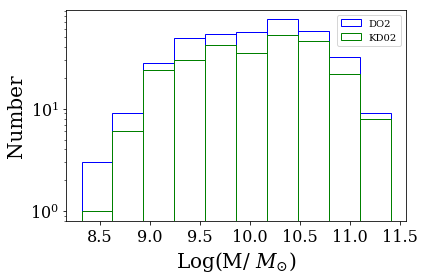

In [157]:
import glob
import re

import matplotlib.pyplot as plt
from astropy.io import fits

# to do
# 1.可以改成subplot


plt.style.reload_library()
plt.style.use('presentation')


# seperation:
def seperation(ifupri, ifusec, dis_ps, pair_p, pair_s):
    dis_coll = []
    count = 0
    for i in range(0, len(pair_p)):
        p = pair_p[i]
        index = np.where(ifupri == p)[0]
        if index.size == 1:
            if ifusec[index] == pair_s[i]:
                dis_coll.append(dis_ps[index][0])
                print('1', p, pair_s[i], ifupri[index],
                      ifusec[index], dis_ps[index][0])
                count += 1
        elif index.size > 1:
            for m in range(0, index.size):
                if ifusec[index[m]] == pair_s[i]:
                    dis_coll.append(dis_ps[index[m]])
                    print('>1', p, pair_s[i], ifupri[index[m]],
                          ifusec[index[m]], dis_ps[index[m]])
                    count += 1

    dis_coll = np.array(dis_coll)
    k = np.where(dis_coll == np.min(dis_coll))
    return dis_coll

# sfr


def sfr(plateifu, sfr, pair_p):
    sfr_p = []
    for i in range(0, len(pair_p)):
        p = pair_p[i]
        index = np.where(plateifu == p)[0]
        if index.size == 1 and sfr[index] > -99:
            sfr_p.append(sfr[index])
    return sfr_p


def stellar_mass_ratio(mass_p, mass_s, pair_p):
    mass_ratio = []
    for i in range(0, len(pair_p)):
        if float(mass_p[i]) > -99 and float(mass_s[i]) > -99:
            if float(mass_p[i])/float(mass_s[i]) > 1:
                mass_ratio.append(
                    (10**float(mass_p[i]))/(10**float(mass_s[i])))
            else:
                mass_ratio.append(
                    (10**float(mass_s[i]))/(10**float(mass_p[i])))

    return mass_ratio


if __name__ == '__main__':

    # 不同金属丰度,mag或者恒星质量的数据:
    pairinfo = glob.glob(dir_res+'pair_info*.fits')

    # coloe
    colors = ['b', 'g', 'orange', 'r']
    bin_s = np.linspace(0, 150, 10)

#     #seperation

#     #读取所有pair的数据:%s kpc, %s km/s
#     filepair=glob.glob(dir_pair+'*pair_mpl8_150_1000.fits')

#     hdu=fits.open(filepair[0])
#     data=hdu[1].data
#     ifupri = data.field('primary_ifu')
#     ifusec = data.field('secondary_ifu')
#     dis_ps = data.field('dis_ps')
#     plt.figure()
#     for i in range(0,len(pairinfo)):

#         hdu1=fits.open(pairinfo[i])
#         data1=hdu1[1].data
#         ifupri1 = data1.field('IFUP')
#         ifusec1 = data1.field('IFUS')

#         sep=seperation(ifupri,ifusec,dis_ps,ifupri1,ifusec1)

#         name=re.split('_',pairinfo[i])[2:4]
#         plt.hist(sep, facecolor='None', label='%s_%s'%(name[0],name[1]),edgecolor=colors[i],bins=bin_s)
#         plt.xlabel('Distance (kpc)')
#         plt.ylabel('Number')
#         plt.legend()
#         plt.savefig(dir_res+'seperation.jpg',dpi=300)
#         hdu1.close()

# #     plt.show()

#     plt.figure()
#     # stellar mass ratio:
#     pairmass=glob.glob(dir_res+'pair_info*mass*.fits')
#     bin_ste=np.linspace(1,150,50)
#     plt.figure()
#     for i in range(0,len(pairmass)):

#         hdu1=fits.open(pairmass[i])
#         data1=hdu1[1].data
#         ifupri1 = data1.field('IFUP')
#         mass_p=data1.field('MASS_PX')
#         mass_s=data1.field('MASS_SX')


#         sep=stellar_mass_ratio(mass_p,mass_s,ifupri1)

#         name=re.split('_',pairmass[i])[2:3]

#         all_mass.append(mass_p)
#         all_mass.append(mass_s)

#         plt.hist(sep, facecolor='None', label='%s'%(name[0]),edgecolor=colors[i],bins=bin_ste)
#         plt.xlabel('Stellar mass ratio')
#         plt.ylabel('Number')
# #         plt.xscale('log')
#         plt.yscale('log')
#         plt.legend()
#         plt.savefig(dir_res+'stellar_mass_ratio.jpg',dpi=300)
#         hdu1.close()
#     plt.show()

    # stellar mass

    plt.figure()
    pairmass = glob.glob(dir_res+'pair_info*mass*150_1000.fits')
    bin_ste = np.linspace(1e8,1e12,10)
    plt.figure()
    for i in range(0, len(pairmass)):
        print(pairmass[i])
        hdu1 = fits.open(pairmass[i])
        data1 = hdu1[1].data
        ifupri1 = data1.field('IFUP')
        mass_p = data1.field('MASS_PX')
        mass_s = data1.field('MASS_SX')

        name = re.split('_', pairmass[i])[2:3]
        
        a=np.hstack((mass_s, mass_p)).astype(np.float)
        plt.hist(a, facecolor='None',
                 label='%s' % (name[0]), edgecolor=colors[i])
        plt.xlabel(r'Log(M/ $M_{\odot}$)')
        plt.ylabel('Number')
#         plt.xscale('log')
        plt.yscale('log')
        plt.legend()
        plt.savefig(dir_res+'stellar_mass.jpg', dpi=300)
        hdu1.close()
    plt.show()


#     #sfr
#     plt.figure()
#     f_sfr=dir_mpl8+'dapall-v2_5_3-2.3.0.fits'
#     hdu_sfr=fits.open(f_sfr)
#     data_sfr=hdu_sfr[1].data
#     plateifu=data_sfr.field('PLATEIFU')
#     sfr_tot=data_sfr.field('SFR_TOT')
#     daptype=data_sfr.field('DAPTYPE')

#     # classify daptype:
#     mask=(daptype=='VOR10-MILESHC-MILESHC')
#     plateifu=plateifu[mask]
#     sfr_tot=sfr_tot[mask]

#     bin_sfr=np.linspace(0,1.35,7)

#     for i in range(0,len(pairinfo)):

#         hdu1=fits.open(pairinfo[i])
#         data1=hdu1[1].data
#         ifupri1 = data1.field('IFUP')
#         ifusec1 = data1.field('IFUS')

#         sfr1=sfr(plateifu,sfr_tot,ifupri1)
#         sfr2=sfr(plateifu,sfr_tot,ifusec1)

#         sfr_all=np.hstack([sfr1,sfr2])
#         name=re.split('_',pairinfo[i])[2:4]
#         plt.hist(sfr_all, facecolor='None', label='%s_%s'%(name[0],name[1]),edgecolor=colors[i],bins=bin_sfr)
#         plt.xlabel(r'Log(SFR) $\rm M_{\odot}$/yr')
#         plt.ylabel('Number')
#         plt.legend()
#         plt.savefig(dir_res+'sfr.jpg',dpi=300)
#         hdu1.close()
#     plt.show()

In [148]:
a=np.hstack((mass_s,mass_p))


array(['10.699', '9.401', '10.039', '10.039', '10.173', '10.319', '9.772',
       '10.461', '11.071', '10.645', '10.561', '10.435', '9.545',
       '10.014', '10.315', '10.096', '10.803', '11.081', '10.71',
       '10.606', '11.074', '11.283', '10.441', '10.508', '10.591',
       '10.316', '11.305', '10.751', '10.705', '10.918', '10.448',
       '10.265', '10.296', '9.7', '10.6', '10.6', '10.284', '10.28',
       '10.273', '10.574', '10.512', '11.103', '10.514', '10.806',
       '9.796', '9.685', '9.202', '11.059', '10.83', '10.711', '10.374',
       '10.182', '10.544', '10.374', '9.747', '9.538', '10.052', '11.065',
       '10.909', '9.005', '10.132', '9.025', '9.446', '11.124', '10.868',
       '11.179', '10.79', '10.895', '10.928', '10.609', '9.772', '9.865',
       '9.549', '9.156', '11.213', '10.487', '9.354', '10.65', '10.436',
       '10.25', '10.25', '10.457', '10.937', '9.31', '9.453', '9.248',
       '10.269', '9.736', '10.486', '10.918', '10.778', '9.596', '9.776',
       '9

In [86]:
import matplotlib
matplotlib.get_configdir()

'/Users/astro/.matplotlib'

In [105]:
matplotlib.get_cachedir()

'/Users/astro/.matplotlib'

In [80]:
a=np.array([1,2,3])
b=np.array([2,3,4])
np.hstack([a,b])

array([1, 2, 3, 2, 3, 4])

In [104]:
plt.style.available

['_classic_test',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10']

In [94]:
cd .matplotlib


/Users/astro/.matplotlib


In [95]:
%ls


fontlist-v300.json  tex.cache/


In [99]:
cat fontlist-v300.json


{
  "_version": 300,
  "_FontManager__default_weight": "normal",
  "default_size": null,
  "defaultFamily": {
    "ttf": "DejaVu Sans",
    "afm": "Helvetica"
  },
  "defaultFont": {
    "ttf": "/Users/astro/.local/miniconda3/envs/public/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf",
    "afm": "/Users/astro/.local/miniconda3/envs/public/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/afm/ptmr8a.afm"
  },
  "ttflist": [
    {
      "fname": "fonts/ttf/DejaVuSansMono-Oblique.ttf",
      "name": "DejaVu Sans Mono",
      "style": "oblique",
      "variant": "normal",
      "weight": 400,
      "stretch": "normal",
      "size": "scalable",
      "__class__": "FontEntry"
    },
    {
      "fname": "fonts/ttf/DejaVuSansMono-Bold.ttf",
      "name": "DejaVu Sans Mono",
      "style": "normal",
      "variant": "normal",
      "weight": "bold",
      "stretch": "normal",
      "size": "scalable",
      "__class__": "FontEntry"
    },
    {
      "fname": "f

In [100]:
mkdir stylelib

In [101]:
%ls

fontlist-v300.json  stylelib/           tex.cache/
